In [9]:
import h5py
import pandas as pd
import numpy as np

In [10]:
df = pd.DataFrame() # Make an empty data frame; you can also use a python dict here 

needed_keys = ['Etot','JR', 'Jphi', 'Jz', 'Lx', 'Ly', 'ecc','U', 'V', 'vr', 'W', 'vphi', 'XGC', 'YGC', 'ZGC', 'zmax', 'source_id'] # source_id is temporarily removed
with h5py.File('../../data/gaia/raw/vel_err_orb_err_rvcorr_all.h5','r') as f:
    print(f.keys()) # Print what columns are in the file
    for key in needed_keys:
        df[key] = np.array(f[key])
print('precut length', len(df))

cutfile = np.load('../../data/gaia/raw/astrometry_qual_v1.npy')
print(cutfile.shape)
df = df[cutfile]
print('postcut length', len(df))

<KeysViewHDF5 ['Etot', 'JR', 'Jphi', 'Jz', 'KE', 'Lx', 'Ly', 'Lz', 'PE', 'U', 'V', 'W', 'XGC', 'YGC', 'ZGC', 'apo', 'cov_UV', 'cov_UW', 'cov_VW', 'cov_vphiz', 'cov_vrphi', 'cov_vrz', 'e_Etot', 'e_JR', 'e_Jphi', 'e_Jz', 'e_KE', 'e_Lx', 'e_Ly', 'e_Lz', 'e_PE', 'e_U', 'e_V', 'e_W', 'e_XGC', 'e_YGC', 'e_ZGC', 'e_apo', 'e_ecc', 'e_peri', 'e_vphi', 'e_vr', 'e_vz', 'e_zmax', 'ecc', 'f_v_forder', 'parallax_zpcorr', 'peri', 'source_id', 'vphi', 'vr', 'vz', 'zero_point_correction', 'zmax']>
precut length 33812183
(33812183,)
postcut length 25907194


In [11]:
df = df.loc[df['zmax']>=4000]
print('final length', len(df))
df.to_hdf('../../data/gaia/raw/common_kinematics.h5', key='star')

final length 75716


<Axes: xlabel='Jphi', ylabel='Etot'>

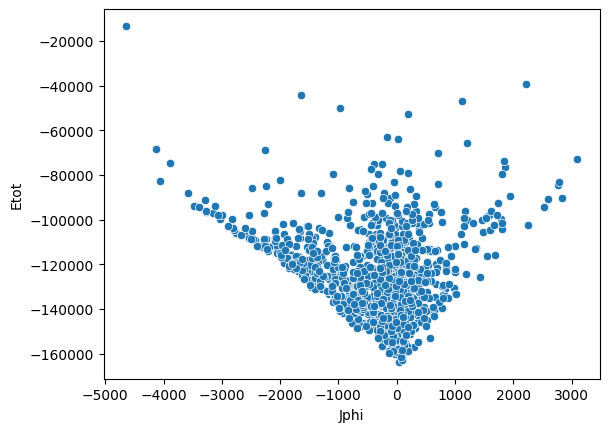

In [17]:
import seaborn as sns
chosen_indices = np.random.choice(len(df), 1000)
df_small = df.iloc[chosen_indices] 
sns.scatterplot(data=df_small, x='Jphi', y='Etot')

In [ ]:
import seaborn as sns

In [ ]:
print(np.mean(df['KE'].to_numpy()))
print(np.std(df['KE'].to_numpy()))

In [ ]:
print(np.min(df['KE']))
print(np.max(df['KE']))

In [ ]:
sns.histplot(data=df, x='Etot')